In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.interpolate import splprep, splev
from bagpy import bagreader
import seaborn as sea
import pandas as pd


In [ ]:
stationary_data = bagreader('/content/drive/MyDrive/Lab2/lab2_open_stat.bag')
open_moving_data = bagreader('/content/drive/MyDrive/Lab2/lab2_open_moving.bag')
obs_stationary_data = bagreader('/content/drive/MyDrive/Lab2/lab2_obstructed_stat2.bag')
obs_moving_data = bagreader('/content/drive/MyDrive/Lab2/lab2_obstructed_moving.bag')


Open Stationary Data Analysis

In [271]:
gps_msg = stationary_data.message_by_topic('full_gps')
df_gps = pd.read_csv(gps_msg)

In [10]:
df_gps

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,latitude,longitude,altitude,gps_quality,utm_easting,utm_northing,zone_number,zone_letter
0,1.645291e+09,40,1645291401,90617656,GPS_Data,42.340787,-71.097352,5.2,4.0,327228.503513,4.689745e+06,19.0,T
1,1.645291e+09,41,1645291402,89273691,GPS_Data,42.340787,-71.097352,5.2,4.0,327228.503513,4.689745e+06,19.0,T
2,1.645291e+09,42,1645291403,91539621,GPS_Data,42.340787,-71.097352,5.2,4.0,327228.503513,4.689745e+06,19.0,T
3,1.645291e+09,43,1645291404,90296983,GPS_Data,42.340787,-71.097352,5.2,4.0,327228.503513,4.689745e+06,19.0,T
4,1.645291e+09,44,1645291405,98053216,GPS_Data,42.340787,-71.097352,5.2,4.0,327228.503513,4.689745e+06,19.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,1.645292e+09,984,1645292345,91702699,GPS_Data,42.340787,-71.097352,5.2,4.0,327228.503513,4.689745e+06,19.0,T
945,1.645292e+09,985,1645292346,84706544,GPS_Data,42.340787,-71.097352,5.2,4.0,327228.503513,4.689745e+06,19.0,T
946,1.645292e+09,986,1645292347,88679790,GPS_Data,42.340787,-71.097352,5.2,4.0,327228.503513,4.689745e+06,19.0,T
947,1.645292e+09,987,1645292348,88538408,GPS_Data,42.340787,-71.097352,5.2,4.0,327228.503969,4.689745e+06,19.0,T


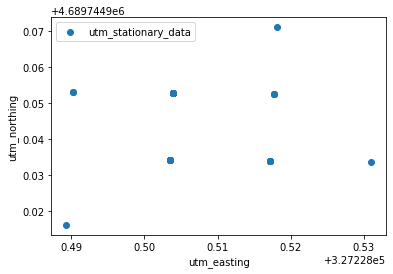

In [272]:
utm_east = df_gps['utm_easting']
utm_north = df_gps['utm_northing']
alt = df_gps['altitude']
gps_quality = df_gps['gps_quality']
time = df_gps['Time']
plt.scatter(utm_east,utm_north, label='utm_stationary_data')
plt.xlabel('utm_easting')
plt.ylabel('utm_northing')
plt.legend()

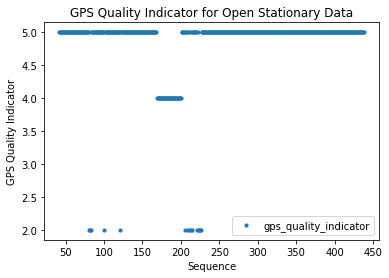

In [167]:
plt.scatter(df_gps['header.seq'],gps_quality, label='gps_quality_indicator',s=10)
plt.xlabel('Sequence')
plt.ylabel('GPS Quality Indicator')
plt.title('GPS Quality Indicator for Open Stationary Data')
plt.legend()

In [273]:
utm_east_mean = np.mean(utm_east)
utm_north_mean = np.mean(utm_north)
alt_mean = np.mean(alt)

utm_east_dev = np.std(utm_east)
utm_north_dev = np.std(utm_north)
alt_dev = np.std(alt)

list_alt = np.ones((alt.shape[0],1))*alt_mean
list_alt_std1 = np.ones((alt.shape[0],1))*alt_dev+list_alt
list_alt_std2 = -np.ones((alt.shape[0],1))*alt_dev+list_alt


In [275]:
print(utm_east_mean)
print(utm_north_mean)
print(alt_mean)
print(utm_east_dev)
print(utm_north_dev)
print(alt_dev)

327228.5036923347
4689744.936940008
5.199789251843953
0.00179690884573572
0.00653317769755635
0.004585891495677294


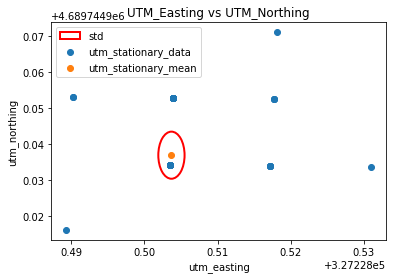

In [17]:
from matplotlib.patches import Ellipse
plt.scatter(utm_east,utm_north, label='utm_stationary_data')
plt.scatter(utm_east_mean,utm_north_mean, label='utm_stationary_mean')
ellipse = Ellipse(xy=(utm_east_mean,utm_north_mean), width=utm_east_dev*2, height=utm_north_dev*2, 
                        edgecolor='r', fc='None', lw=2, label='std')
plt.gca().add_patch(ellipse)
plt.xlabel('utm_easting')
plt.ylabel('utm_northing')
plt.title('UTM_Easting vs UTM_Northing')
plt.legend()

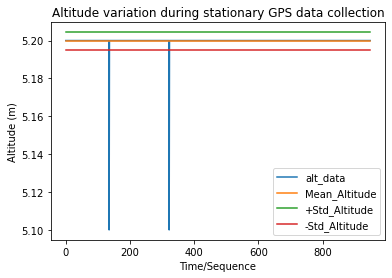

In [216]:
plt.plot(alt,label='alt_data')
plt.plot(list_alt, label='Mean_Altitude')
plt.plot(list_alt_std1, label='+Std_Altitude')
plt.plot(list_alt_std2, label='-Std_Altitude')
plt.xlabel('Time/Sequence')
plt.ylabel('Altitude (m)')
plt.title('Altitude variation during stationary GPS data collection')
plt.legend()

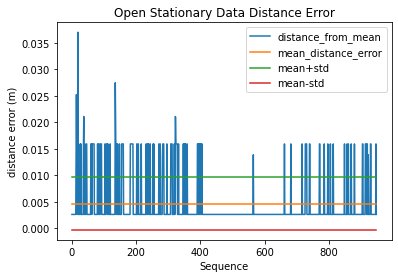

In [263]:
distance_error = np.sqrt((utm_east-utm_east_mean)*(utm_east-utm_east_mean)+(utm_north-utm_north_mean)*(utm_north-utm_north_mean))
#plt.scatter(df_gps['header.seq'],distance_error,s=5, color='r')
error_mean = np.mean(distance_error)
error_dev = np.std(distance_error)

list_error = np.ones((distance_error.shape[0],1))*error_mean
list_error_std1 = np.ones((distance_error.shape[0],1))*error_dev+list_error
list_error_std2 = -np.ones((distance_error.shape[0],1))*error_dev+list_error
plt.plot(distance_error, label='distance_from_mean')
plt.plot(list_error, label='mean_distance_error')
plt.plot(list_error_std1, label='mean+std')
plt.plot(list_error_std2, label= 'mean-std')
plt.xlabel('Sequence')
plt.ylabel('distance error (m)')
plt.title('Open Stationary Data Distance Error')
plt.legend()

Open Moving Data Analysis

In [276]:
gps_msg = open_moving_data.message_by_topic('full_gps')
df_gps = pd.read_csv(gps_msg)

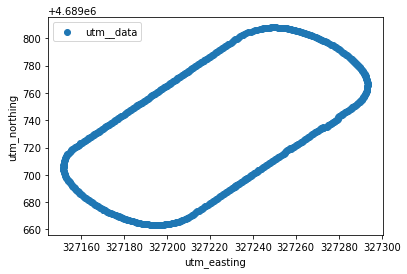

In [277]:
utm_east = df_gps['utm_easting']
utm_north = df_gps['utm_northing']
alt = df_gps['altitude']
gps_quality = df_gps['gps_quality']
time = df_gps['Time']
plt.scatter(utm_east,utm_north, label='utm__data')
plt.xlabel('utm_easting')
plt.ylabel('utm_northing')
plt.legend()

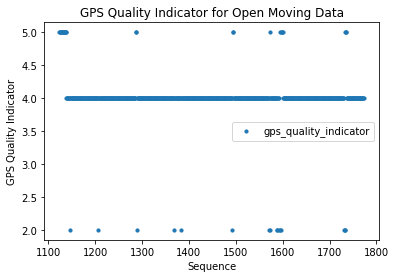

In [281]:
plt.scatter(df_gps['header.seq'],gps_quality, label='gps_quality_indicator',s=10)
plt.xlabel('Sequence')
plt.ylabel('GPS Quality Indicator')
plt.title('GPS Quality Indicator for Open Moving Data')
plt.legend()

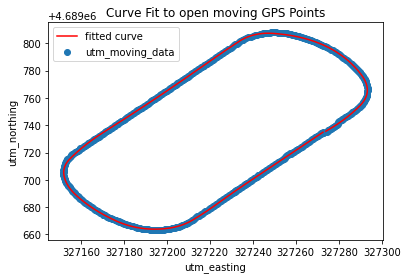

In [279]:
tck, u= splprep([utm_east,utm_north], s=100, k =2)
new_points = splev(u, tck)
plt.scatter(utm_east,utm_north, label='utm_moving_data')
plt.plot(new_points[0],new_points[1], 'r',label='fitted curve')
plt.title('Curve Fit to open moving GPS Points')
plt.xlabel('utm_easting')
plt.ylabel('utm_northing')
plt.legend()


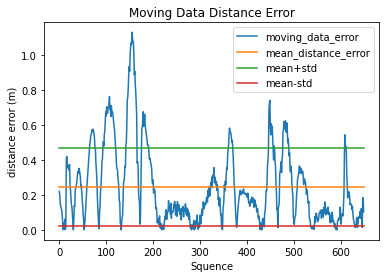

In [280]:
distance_error = abs(np.array(new_points[1] - utm_north))
error_mean = np.mean(distance_error)
error_dev = np.std(distance_error)

list_error = np.ones((distance_error.shape[0],1))*error_mean
list_error_std1 = np.ones((distance_error.shape[0],1))*error_dev+list_error
list_error_std2 = -np.ones((distance_error.shape[0],1))*error_dev+list_error
plt.plot(abs(distance_error), label='moving_data_error')
plt.plot(list_error, label='mean_distance_error')
plt.plot(list_error_std1, label='mean+std')
plt.plot(list_error_std2, label= 'mean-std')
plt.xlabel('Squence')
plt.ylabel('distance error (m)')
plt.title('Moving Data Distance Error')
plt.legend()

In [282]:
error_mean

0.24852237734370508

In [92]:
alt_mean = np.mean(alt)
alt_dev = np.std(alt)

list_alt = np.ones((alt.shape[0],1))*alt_mean
list_alt_std1 = np.ones((alt.shape[0],1))*alt_dev+list_alt
list_alt_std2 = -np.ones((alt.shape[0],1))*alt_dev+list_alt

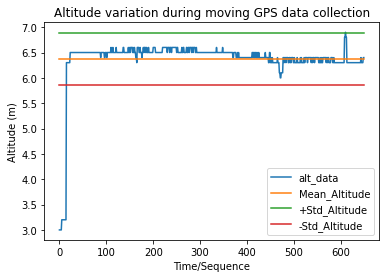

In [94]:
plt.plot(alt, label='alt_data')
plt.plot(list_alt, label='Mean_Altitude')
plt.plot(list_alt_std1, label='+Std_Altitude')
plt.plot(list_alt_std2, label='-Std_Altitude')
plt.xlabel('Time/Sequence')
plt.ylabel('Altitude (m)')
plt.title('Altitude variation during moving GPS data collection')
plt.legend()

Obs Stationary Data Analysis

In [284]:
gps_msg = obs_stationary_data.message_by_topic('full_gps')
df_gps = pd.read_csv(gps_msg)

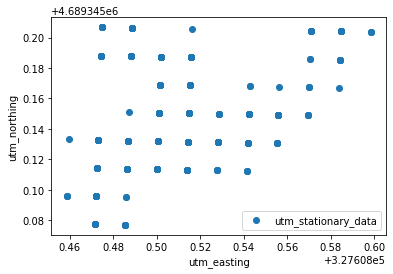

In [285]:
utm_east = df_gps['utm_easting']
utm_north = df_gps['utm_northing']
alt = df_gps['altitude']
gps_quality = df_gps['gps_quality']
time = df_gps['Time']
plt.scatter(utm_east,utm_north, label='utm_stationary_data')
plt.xlabel('utm_easting')
plt.ylabel('utm_northing')
plt.legend()

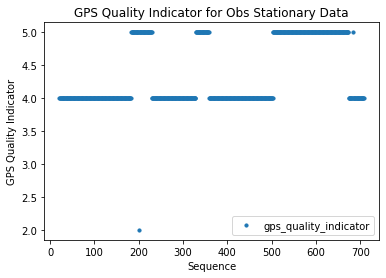

In [286]:
plt.scatter(df_gps['header.seq'],gps_quality, label='gps_quality_indicator',s=10)
plt.xlabel('Sequence')
plt.ylabel('GPS Quality Indicator')
plt.title('GPS Quality Indicator for Obs Stationary Data')
plt.legend()


In [287]:
utm_east_mean = np.mean(utm_east)
utm_north_mean = np.mean(utm_north)
alt_mean = np.mean(alt)

utm_east_dev = np.std(utm_east)
utm_north_dev = np.std(utm_north)
alt_dev = np.std(alt)

list_alt = np.ones((alt.shape[0],1))*alt_mean
list_alt_std1 = np.ones((alt.shape[0],1))*alt_dev+list_alt
list_alt_std2 = -np.ones((alt.shape[0],1))*alt_dev+list_alt


In [288]:
print(utm_east_mean)
print(utm_north_mean)
print(alt_mean)
print(utm_east_dev)
print(utm_north_dev)
print(alt_dev)

327608.5069007287
4689345.14757023
27.744331395348972
0.02634855542566474
0.03328689598018663
0.22791360448063402


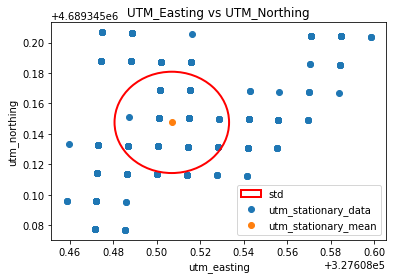

In [268]:
from matplotlib.patches import Ellipse
plt.scatter(utm_east,utm_north, label='utm_stationary_data')
plt.scatter(utm_east_mean,utm_north_mean, label='utm_stationary_mean')
ellipse = Ellipse(xy=(utm_east_mean,utm_north_mean), width=utm_east_dev*2, height=utm_north_dev*2, 
                        edgecolor='r', fc='None', lw=2, label='std')
plt.gca().add_patch(ellipse)
plt.xlabel('utm_easting')
plt.ylabel('utm_northing')
plt.title('UTM_Easting vs UTM_Northing')
plt.legend()

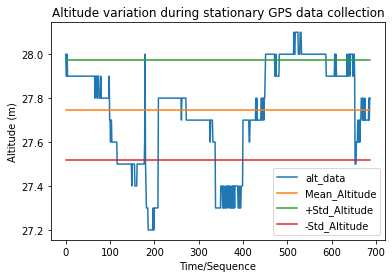

In [269]:
plt.plot(alt, label='alt_data')
plt.plot(list_alt, label='Mean_Altitude')
plt.plot(list_alt_std1, label='+Std_Altitude')
plt.plot(list_alt_std2, label='-Std_Altitude')
plt.xlabel('Time/Sequence')
plt.ylabel('Altitude (m)')
plt.title('Altitude variation during stationary GPS data collection')
plt.legend()

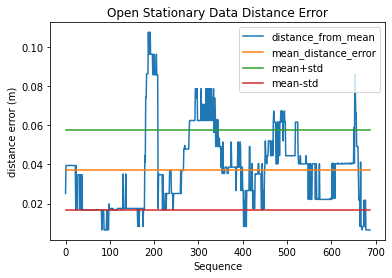

In [289]:
distance_error = np.sqrt((utm_east-utm_east_mean)*(utm_east-utm_east_mean)+(utm_north-utm_north_mean)*(utm_north-utm_north_mean))
#plt.scatter(df_gps['header.seq'],distance_error,s=5, color='r')
error_mean = np.mean(distance_error)
error_dev = np.std(distance_error)

list_error = np.ones((distance_error.shape[0],1))*error_mean
list_error_std1 = np.ones((distance_error.shape[0],1))*error_dev+list_error
list_error_std2 = -np.ones((distance_error.shape[0],1))*error_dev+list_error
plt.plot(distance_error, label='distance_from_mean')
plt.plot(list_error, label='mean_distance_error')
plt.plot(list_error_std1, label='mean+std')
plt.plot(list_error_std2, label= 'mean-std')
plt.xlabel('Sequence')
plt.ylabel('distance error (m)')
plt.title('Open Stationary Data Distance Error')
plt.legend()

In [290]:
error_mean

0.03717314098858878

Obs Moving Data Analysis

In [292]:
gps_msg = obs_moving_data.message_by_topic('full_gps')
df_gps = pd.read_csv(gps_msg)

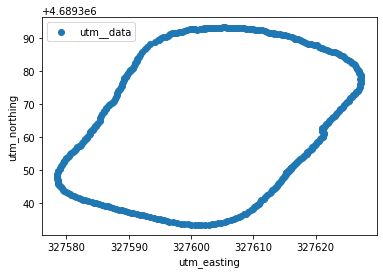

In [293]:
utm_east = df_gps['utm_easting']
utm_north = df_gps['utm_northing']
alt = df_gps['altitude']
gps_quality = df_gps['gps_quality']
time = df_gps['Time']
plt.scatter(utm_east,utm_north, label='utm__data')
plt.xlabel('utm_easting')
plt.ylabel('utm_northing')
plt.legend()

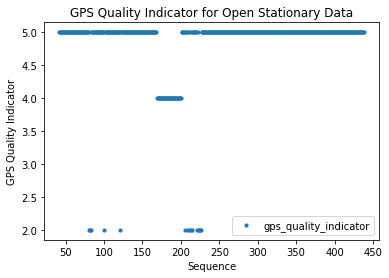

In [294]:
plt.scatter(df_gps['header.seq'],gps_quality, label='gps_quality_indicator',s=10)
plt.xlabel('Sequence')
plt.ylabel('GPS Quality Indicator')
plt.title('GPS Quality Indicator for Open Stationary Data')
plt.legend()

In [295]:
xp = np.array(utm_east)
yp = np.array(utm_north)

In [296]:
okay = np.where(np.abs(np.diff(xp)) + np.abs(np.diff(yp)) > 0)
xp = np.r_[xp[okay], xp[-1], xp[0]]
yp = np.r_[yp[okay], yp[-1], yp[0]]

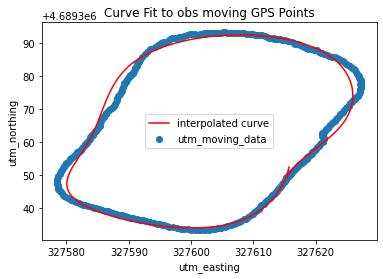

In [297]:
tck, u = splprep([xp,yp], s= 450, k=3)
new_points = splev(u, tck)
plt.scatter(utm_east,utm_north, label='utm_moving_data')
plt.plot(new_points[0],new_points[1], 'r',label='interpolated curve')
plt.title('Curve Fit to obs moving GPS Points')
plt.xlabel('utm_easting')
plt.ylabel('utm_northing')
plt.legend()


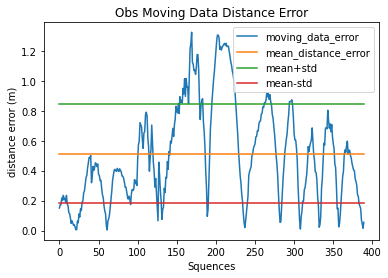

In [298]:
distance_error = abs(np.array(new_points[1][:390] - yp[:390]))
error_mean = np.mean(distance_error)
error_dev = np.std(distance_error)

list_error = np.ones((distance_error.shape[0],1))*error_mean
list_error_std1 = np.ones((distance_error.shape[0],1))*error_dev+list_error
list_error_std2 = -np.ones((distance_error.shape[0],1))*error_dev+list_error
plt.plot(abs(distance_error), label='moving_data_error')
plt.plot(list_error, label='mean_distance_error')
plt.plot(list_error_std1, label='mean+std')
plt.plot(list_error_std2, label= 'mean-std')
plt.xlabel('Squences')
plt.ylabel('distance error (m)')
plt.title('Obs Moving Data Distance Error')
plt.legend()

In [132]:
alt_mean = np.mean(alt)
alt_dev = np.std(alt)

list_alt = np.ones((alt.shape[0],1))*alt_mean
list_alt_std1 = np.ones((alt.shape[0],1))*alt_dev+list_alt
list_alt_std2 = -np.ones((alt.shape[0],1))*alt_dev+list_alt

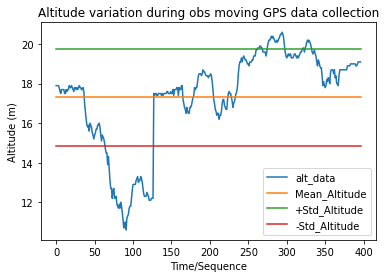

In [134]:
plt.plot(alt, label='alt_data')
plt.plot(list_alt, label='Mean_Altitude')
plt.plot(list_alt_std1, label='+Std_Altitude')
plt.plot(list_alt_std2, label='-Std_Altitude')
plt.xlabel('Time/Sequence')
plt.ylabel('Altitude (m)')
plt.title('Altitude variation during obs moving GPS data collection')
plt.legend()